In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from PIL import Image
from wordcloud import WordCloud
import plotly.express as px

## Image Request ## 
import requests
from io import BytesIO

color_scheme = px.colors.sequential.Reds

![Alt text](image-1.png)

In [2]:
df = pd.read_csv("./data/Global YouTube Statistics.csv" , encoding= 'latin-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
df.isna().sum() # We'll take care of it when we build a model.

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [5]:
df[df['created_year'] < 2005] # A wrong values. Youtube created in 2005 so any channel can't be created before 2005.

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970.0,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


In [6]:
df.drop(df.loc[df['created_year'] < 2005].index, inplace=True)

In [7]:
df.shape[0] - df.dropna(thresh = len(df.columns) - 1).shape[0] # Number of rows with only 1 property nan.

147

In [8]:
df.dropna(thresh= len(df.columns)-1)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


# Questioned Analysis

### 1- In which years were the most popular youtube channels created ?

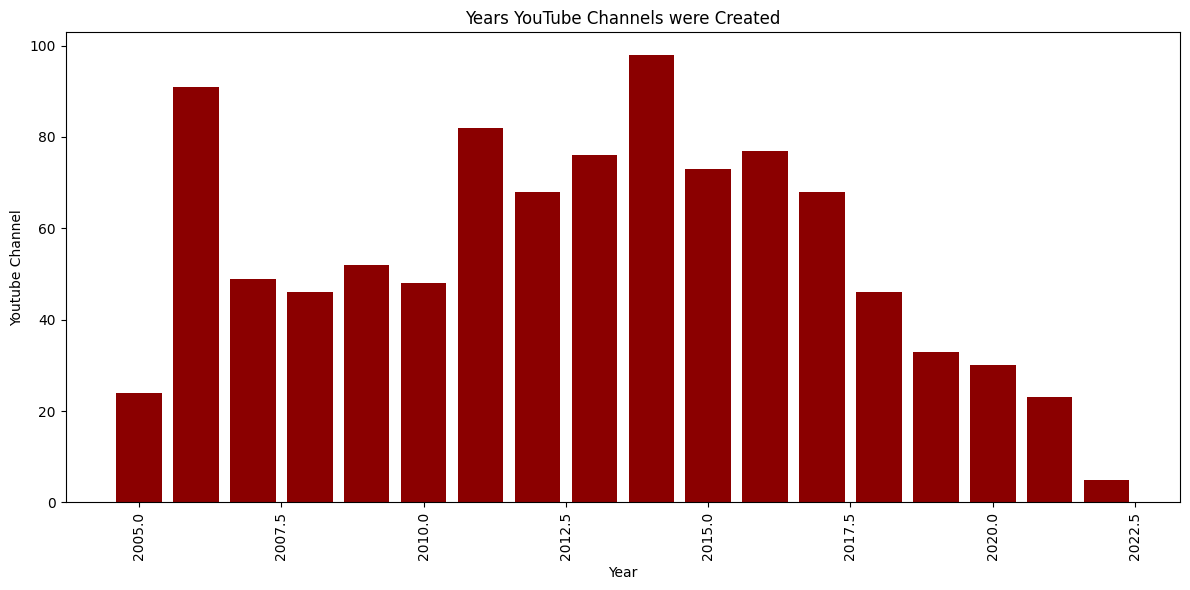

In [9]:
year_counts = df['created_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6)) 
plt.bar(year_counts.index, year_counts.values, color='darkred')
plt.title('Years YouTube Channels were Created')
plt.xlabel('Year')
plt.ylabel('Youtube Channel')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [10]:
year_counts = df['created_year'].value_counts().sort_index()

fig = go.Figure() 

fig.add_trace(
    go.Scatter(
        x=year_counts.index,
        y=year_counts.values,
        fill='tozeroy',
        line_color='darkred',
        mode='lines+markers'
    )
)

fig.update_layout(
    title_text='YouTube Channels Created Year',
    template='plotly_white',
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Channels',
        titlefont_size=16
    ),
)

fig.show()

Youtubers who have more than 12 million subscribers mostly created in 2006 and 2014 years.

### 2- What is the name of the 30 youtube channels with the most subscribers ?

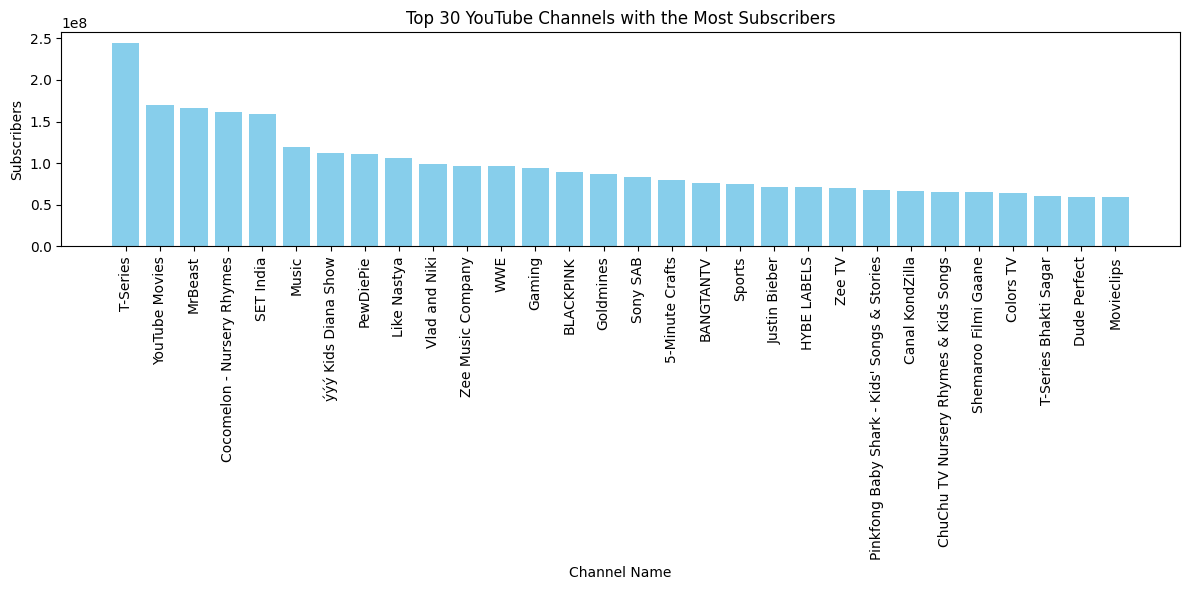

In [11]:
top_30_channels = df.sort_values(by='subscribers', ascending=False).head(30)[['Youtuber', 'subscribers']]

plt.figure(figsize=(12, 6)) 
plt.bar(top_30_channels['Youtuber'], top_30_channels['subscribers'], color='skyblue') 
plt.title('Top 30 YouTube Channels with the Most Subscribers')
plt.xlabel('Channel Name')
plt.ylabel('Subscribers')
plt.xticks(rotation=90) 
plt.tight_layout()  

plt.show()

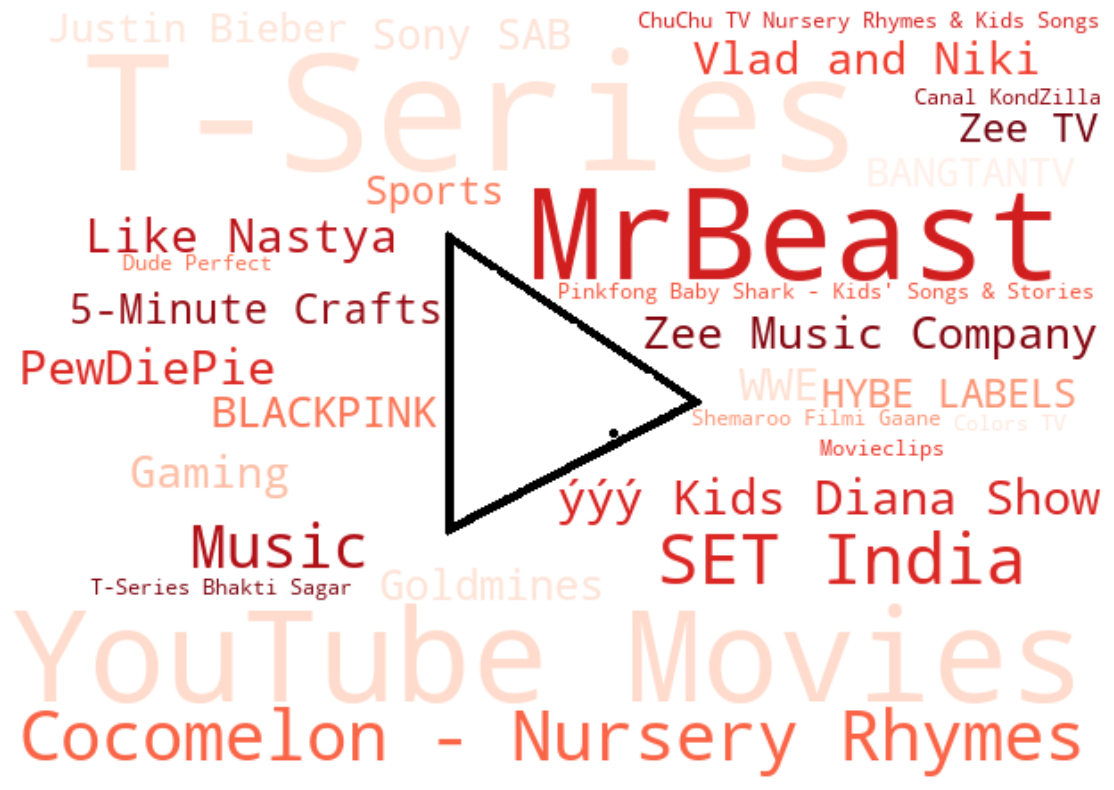

In [12]:
youtubers_data = dict(zip(df['Youtuber'].tolist(), df['subscribers'].tolist()))

plt.figure(figsize=(30,10))

response = requests.get('https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/952/cached.offlinehbpl.hbpl.co.uk/news/ORP/YouTube-icon-full_color-20150527090518393.png')
mask_image = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(width=800,
               height=500,
               max_words=30,
               mask=mask_image,
               colormap='Reds_r',
               contour_color='black',
               contour_width=3,
               background_color='white').generate_from_frequencies(youtubers_data)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3- What is the distribution of the 10 youtube channels with the most subscribers ?

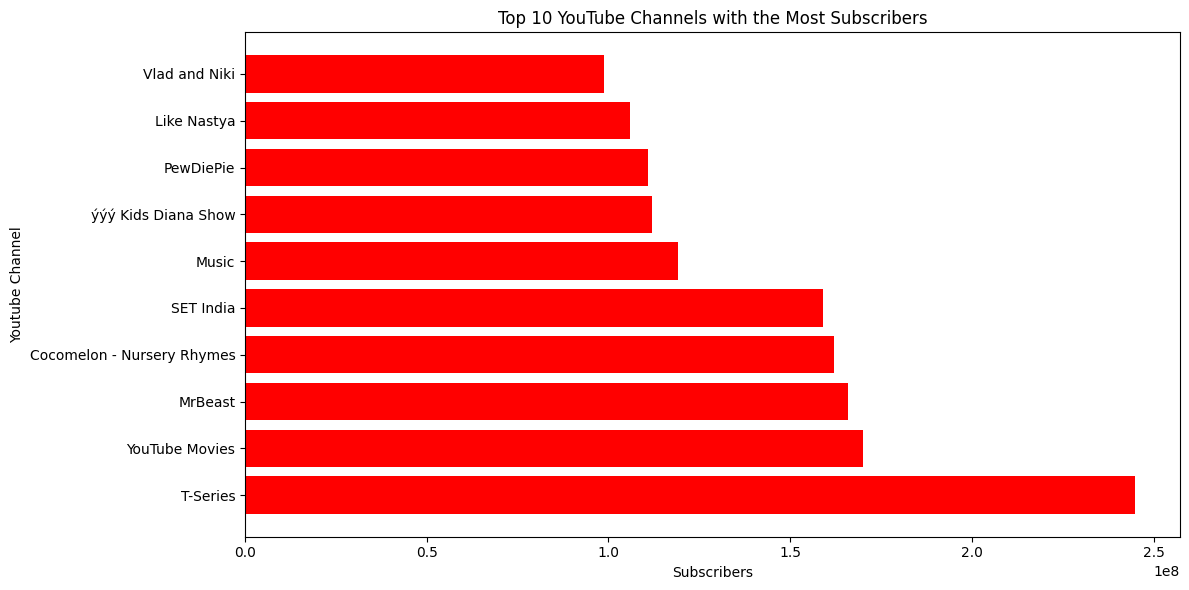

In [13]:
top10_most_subscribed_channels = df[:10]

plt.figure(figsize=(12, 6)) 
plt.barh(top10_most_subscribed_channels['Youtuber'], top10_most_subscribed_channels['subscribers'], color='red')
plt.title('Top 10 YouTube Channels with the Most Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Youtube Channel')

plt.tight_layout() 

plt.show()

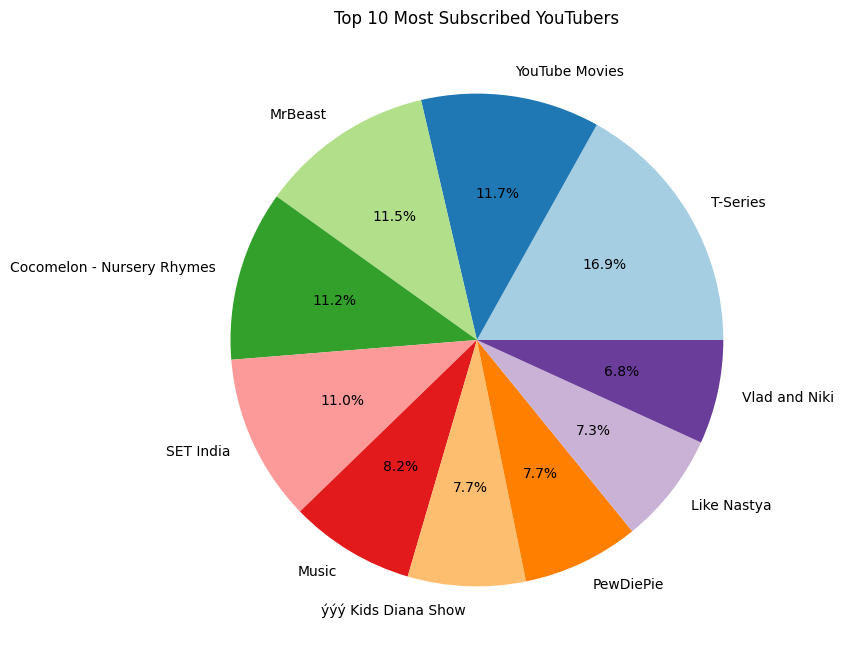

In [24]:
top10_most_subscribed_channels = top10_most_subscribed_channels.sort_values(by='subscribers', ascending=False)

data = top10_most_subscribed_channels.head(10)  # İlk 10 kanalı alın

plt.figure(figsize=(8, 8))
plt.pie(data['subscribers'], labels=data['Youtuber'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(data['Youtuber']))))
plt.title('Top 10 Most Subscribed YouTubers')

plt.show()

T-Series is the most then Mr Beast, Cocomelon - Nursery Rhymes are top Youtubers who have most subscribers.

### 4- Which countries has the most youtube channels in the top 100?

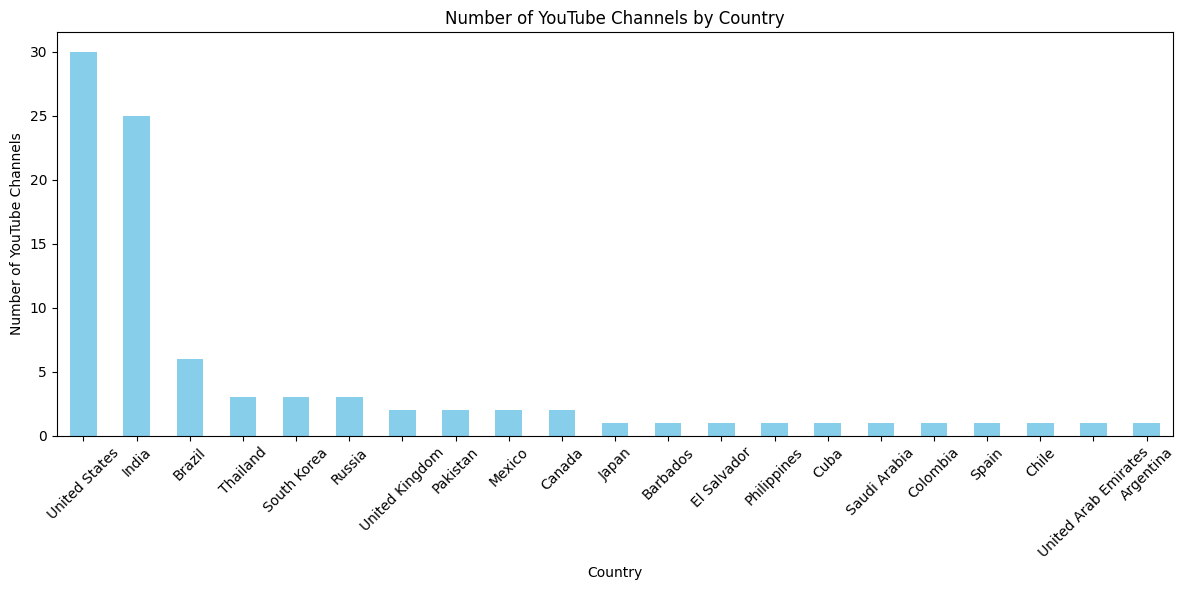

In [15]:
top100 = df.loc[:99].groupby('Country').count()['Youtuber'].sort_values(ascending= False)

plt.figure(figsize=(12, 6))
top100.plot(kind='bar', color='skyblue')  
plt.title('Number of YouTube Channels by Country')
plt.xlabel('Country')
plt.ylabel('Number of YouTube Channels')
plt.xticks(rotation=45) 
plt.tight_layout() 

In [20]:
top100

Country
United States           30
India                   25
Brazil                   6
Thailand                 3
South Korea              3
Russia                   3
United Kingdom           2
Pakistan                 2
Mexico                   2
Canada                   2
Japan                    1
Barbados                 1
El Salvador              1
Philippines              1
Cuba                     1
Saudi Arabia             1
Colombia                 1
Spain                    1
Chile                    1
United Arab Emirates     1
Argentina                1
Name: Youtuber, dtype: int64

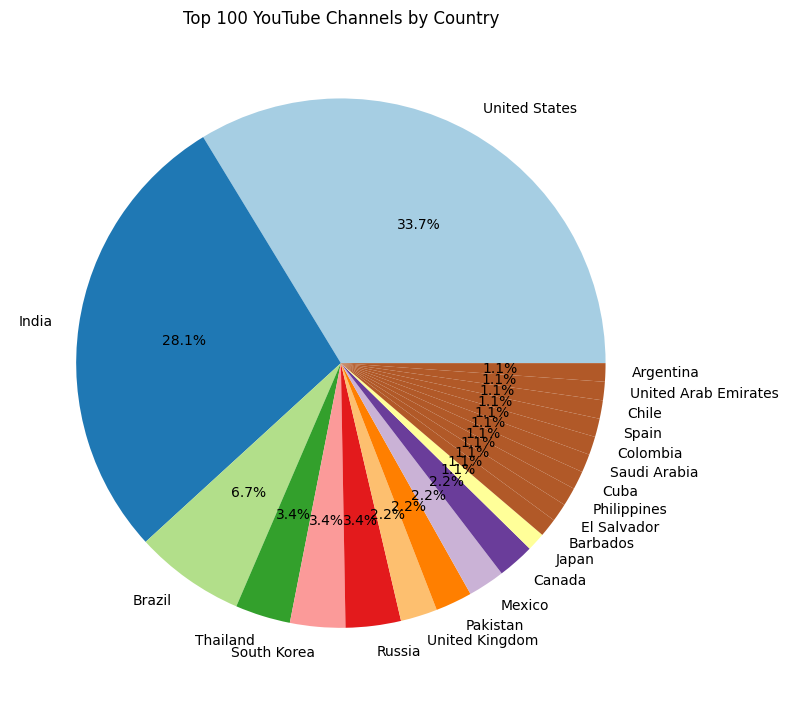

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(top100, labels=top100.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top100.index))))
plt.title('Top 100 YouTube Channels by Country')

plt.tight_layout()
plt.show()

### 5- Total number of subscribers by country

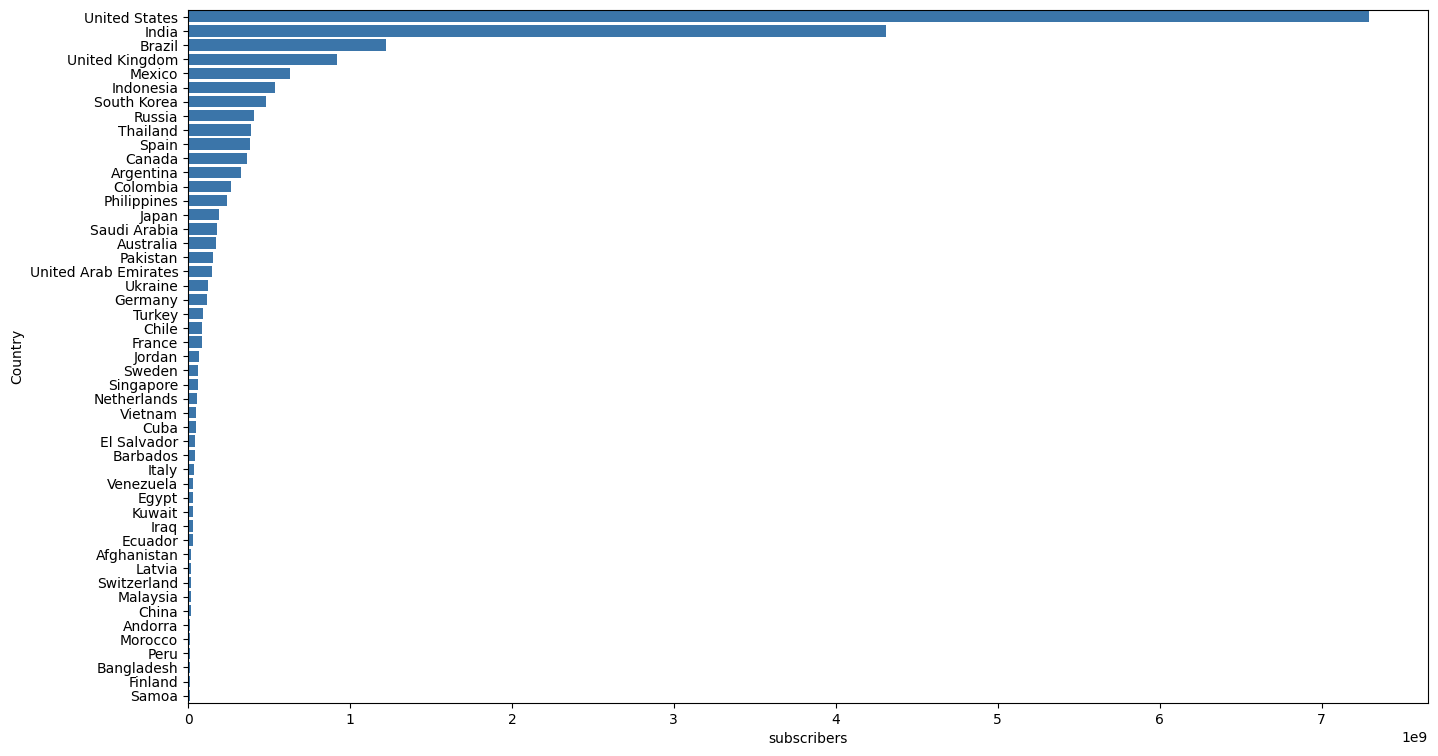

In [25]:
plt.figure(figsize = (16,9))

sns.barplot(data = df.groupby(['Country'])['subscribers'].sum().reset_index().sort_values(['subscribers'], ascending = False)
            , x = 'subscribers', y = 'Country', estimator = sum, errorbar = ('ci', False) , color = sns.xkcd_rgb['bluish'], orient = 'h')

plt.show()

In [26]:
subscribers_by_country = df.groupby(['Country'])['subscribers'].sum().reset_index()

fig = px.choropleth(
    subscribers_by_country,
    locations='Country',
    locationmode='country names',
    color='subscribers',
    hover_name='Country',
    color_continuous_scale='blues',
    title='Total number of subscribers by country'
)

fig.show()

# Done for now.